# Tugas 1: Pemrograman perbaikan citra dalam domain spasial
- Point Processing
- Histogram Equalization
- Contrast Limited Adaptive Histogram Equalization (CLAHE)

### Import Library

In [2]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import shutil

### Create Directory

In [6]:
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

base_dir = "."

directories = [
    "Original",
    "Output/FFT/1D",
    "Output/FFT/2D",
    "Output/Grayed",
    "Output/LFP/BLFP",
    "Output/LFP/GLFP",
    "Output/LFP/ILFP",
    "Output/HPF/BHPF",
    "Output/HPF/GHPF",
    "Output/HPF/IHPF",
    "Output/NotchFilter/Butterworth_Notch_Reject_Filter",
    "Output/NotchFilter/Notch_Pass_Filter",
    "Output/NotchFilter/Vertical_Notch_Reject_Filter",
    "Output/HomomorphicFilter"
]

for directory in directories:
    create_directory(os.path.join(base_dir, directory))

### Import Picture

### Local
Run this if you are on local

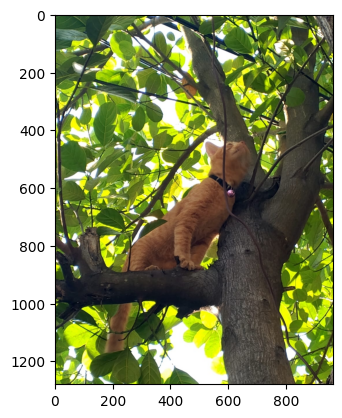

In [4]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Import Image
def import_image():
    Tk().withdraw()
    img_path = askopenfilename(title="Select an image", filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])
    
    if img_path:
        shutil.copy(img_path, 'Original')
        # print(f"Image saved to {img_path}")
        return img_path
    else:
        print("No image selected.")
        return None
    
# Display Image
def display_image(image_path):
    if image_path:
        img = Image.open(image_path)
        plt.imshow(img)
        # plt.axis('off')
        plt.show()
    else:
        print("No image to display.")
    
image_path = import_image()
display_image(image_path)

### Google Colab
Run this if you are on google colab

In [ ]:
from google.colab import files

# Import Image
def import_image_colab():
    uploaded = files.upload()
    
    if uploaded:
        img_path = list(uploaded.keys())[0]
        
        if not os.path.exists('Original'):
            os.makedirs('Original')
        shutil.move(img_path, os.path.join('Original', img_path))
        
        return os.path.join('Original', img_path)
    else:
        print("No image uploaded.")
        return None

# Display Image
def display_image(image_path):
    if image_path:
        img = Image.open(image_path)
        plt.imshow(img)
        # plt.axis('off')
        plt.show()
    else:
        print("No image to display.")

image_path = import_image_colab()
display_image(image_path)

### Turn The Image Into Gray Scale

Grayscale image saved to: Output/Grayed\mycat_grayed.jpg


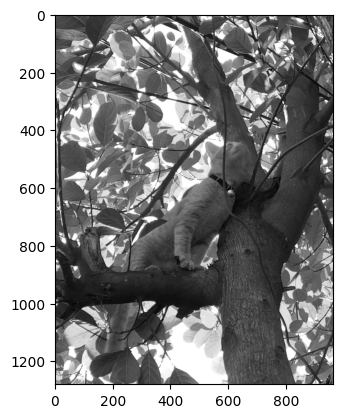

In [7]:
# Gray Scaling
def convert_to_grayscale(image_path):
    img = Image.open(image_path).convert("L")
    return img

def save_grayscale_image(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)
    gray_img = convert_to_grayscale(image_path)
    
    new_filename = f"{name}_grayed{ext}"
    new_path = os.path.join("Output/Grayed", new_filename)
    
    gray_img.save(new_path)
    print(f"Grayscale image saved to: {new_path}")

save_grayscale_image(image_path)

# Display
def display_grayscale_image(image_path):
    img = Image.open(image_path)
    
    plt.imshow(img, cmap="gray")
    # plt.axis('off')
    plt.show()

display_grayscale_image(os.path.join("Output/Grayed", f"{os.path.splitext(os.path.basename(image_path))[0]}_grayed{os.path.splitext(image_path)[1]}"))


## FFT

### Choose Image

In [10]:
selected_filename = "mycat_grayed.jpg"  
input_path = os.path.join("Output/Grayed", selected_filename)

### Calculation & Display The Result

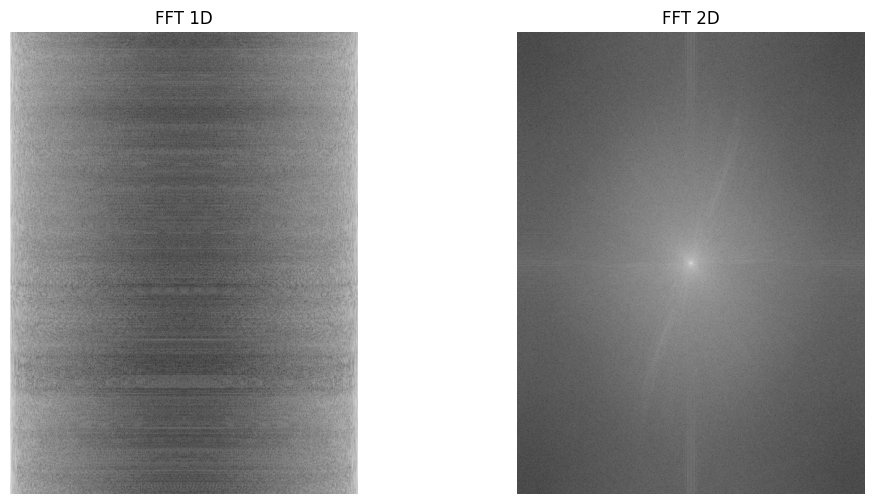

FFT image saved to: Output/FFT/1D\mycat_grayed_FFT_1D.jpg
FFT image saved to: Output/FFT/2D\mycat_grayed_FFT_2D.jpg


<Figure size 640x480 with 0 Axes>

In [15]:
# 1D FFT
def apply_fft1d(image):
    img_array = np.asarray(image)
    
    # Terapkan FFT pada setiap baris (sumbu 1)
    fft_1d = np.abs(np.fft.fft(img_array, axis=1))
    
    # Normalisasi
    fft_1d = np.log(fft_1d + 1)
    return fft_1d

# 2D FFT
def apply_fft2d(image):
    img_array = np.asarray(image)
    
    # Terapkan FFT 2D dan geser pusat ke tengah
    fft_2d = np.fft.fft2(img_array)
    fft_2d_shifted = np.fft.fftshift(fft_2d)
    
    # Ambil magnitudo dan normalisasi
    magnitude_spectrum = np.log(np.abs(fft_2d_shifted) + 1)
    return magnitude_spectrum

def save(output_path):
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    print(f"FFT image saved to: {output_path}")

def process_and_display_fft(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)
    
    image = Image.open(image_path)

    fft_1d = apply_fft1d(image)
    fft_2d = apply_fft2d(image)

    output_path_1d = os.path.join("Output/FFT/1D", f"{name}_FFT_1D.jpg")
    output_path_2d = os.path.join("Output/FFT/2D", f"{name}_FFT_2D.jpg")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(fft_1d, cmap="gray")
    axes[0].set_title("FFT 1D")
    axes[0].axis('off')

    axes[1].imshow(fft_2d, cmap="gray")
    axes[1].set_title("FFT 2D")
    axes[1].axis('off')

    plt.show()

    save(output_path_1d)
    save(output_path_2d)

process_and_display_fft(input_path)

## LFP

### Choose Image

In [16]:
selected_filename = "mycat_grayed.jpg"  
input_path = os.path.join("Output/Grayed", selected_filename)

### Calculation & Display The Result

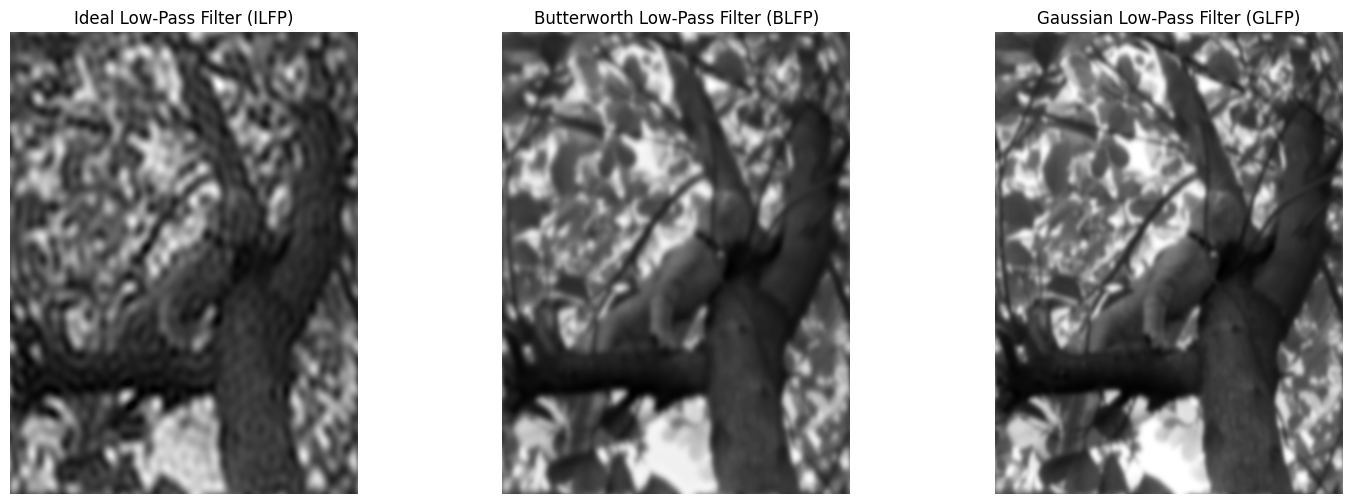

Filtered image saved to: Output/LFP/ILFP\mycat_grayed_ILFP.jpg
Filtered image saved to: Output/LFP/BLFP\mycat_grayed_BLFP.jpg
Filtered image saved to: Output/LFP/GLFP\mycat_grayed_GLFP.jpg


<Figure size 640x480 with 0 Axes>

In [19]:
# Ideal LPF
def ideal_lowpass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) <= cutoff:
                mask[i, j] = 1
    return mask

# Butterworth LPF
def butterworth_lowpass_filter(shape, cutoff, n):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (d / cutoff) ** (2 * n))
    return mask

# Gaussian LPF
def gaussian_lowpass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = np.exp(-(d ** 2) / (2 * (cutoff ** 2)))
    return mask

def apply_filter(image, filter_mask):
    img_array = np.asarray(image, dtype=np.float32)
    fft_img = np.fft.fft2(img_array)
    fft_img_shifted = np.fft.fftshift(fft_img)
    
    filtered_fft = fft_img_shifted * filter_mask
    
    filtered_img = np.fft.ifft2(np.fft.ifftshift(filtered_fft))
    return np.abs(filtered_img)

def save(output_path):
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    print(f"Filtered image saved to: {output_path}")

def process_and_display_lfp(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)
    
    image = Image.open(image_path)

    shape = image.size[::-1]  # Menukar urutan agar sesuai dengan (rows, cols)
    cutoff = 30 
    n = 2 

    ilfp = apply_filter(image, ideal_lowpass_filter(shape, cutoff))
    blfp = apply_filter(image, butterworth_lowpass_filter(shape, cutoff, n))
    glfp = apply_filter(image, gaussian_lowpass_filter(shape, cutoff))

    output_path_ilfp = os.path.join("Output/LFP/ILFP", f"{name}_ILFP.jpg")
    output_path_blfp = os.path.join("Output/LFP/BLFP", f"{name}_BLFP.jpg")
    output_path_glfp = os.path.join("Output/LFP/GLFP", f"{name}_GLFP.jpg")

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axes[0].imshow(ilfp, cmap='gray')
    axes[0].set_title("Ideal Low-Pass Filter (ILFP)")
    axes[0].axis('off')

    axes[1].imshow(blfp, cmap='gray')
    axes[1].set_title("Butterworth Low-Pass Filter (BLFP)")
    axes[1].axis('off')

    axes[2].imshow(glfp, cmap='gray')
    axes[2].set_title("Gaussian Low-Pass Filter (GLFP)")
    axes[2].axis('off')

    plt.show()

    save(ilfp, "ILFP", output_path_ilfp)
    save(blfp, "BLFP", output_path_blfp)
    save(glfp, "GLFP", output_path_glfp)

process_and_display_lfp(input_path)

## HPF

### Choose Image

In [11]:
selected_filename = "mycat_grayed.jpg"  
input_path = os.path.join("Output/Grayed", selected_filename)

### Calculation & Display The Result

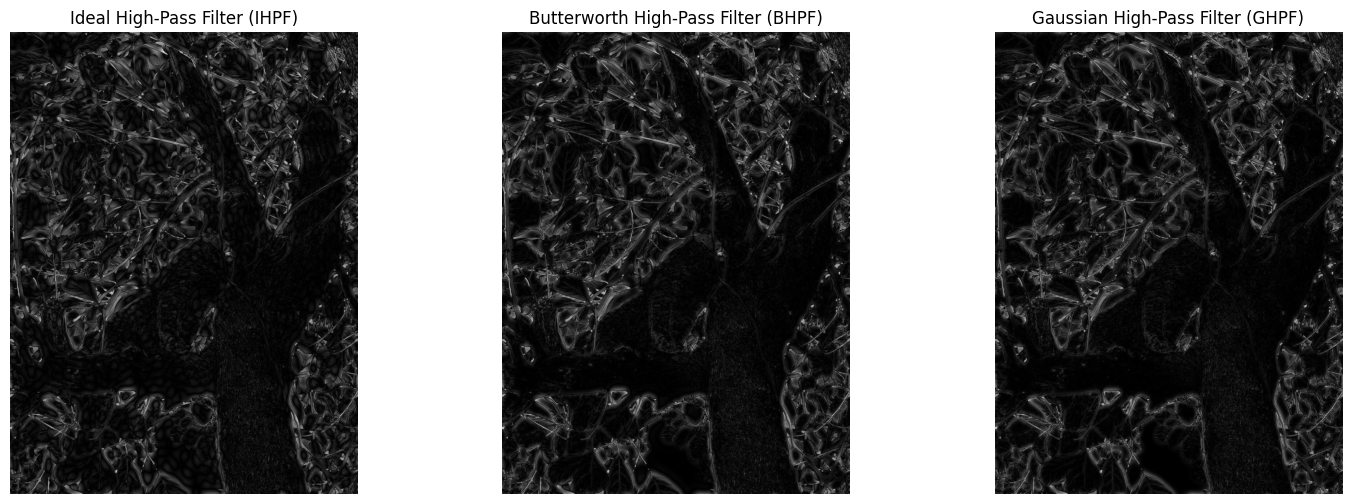

Filtered image saved to: Output/HPF/IHPF\mycat_grayed_IHPF.jpg
Filtered image saved to: Output/HPF/BHPF\mycat_grayed_BHPF.jpg
Filtered image saved to: Output/HPF/GHPF\mycat_grayed_GHPF.jpg


<Figure size 640x480 with 0 Axes>

In [20]:
# Ideal HPF
def ideal_highpass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) <= cutoff:
                mask[i, j] = 0
            else:
                mask[i, j] = 1
    return mask

# FButterworth HPF
def butterworth_highpass_filter(shape, cutoff, n):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (cutoff / d) ** (2 * n)) if d > 0 else 0
    return mask

# Gaussian HPF
def gaussian_highpass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 - np.exp(-(d ** 2) / (2 * (cutoff ** 2)))
    return mask

def apply_filter(image, filter_mask):
    img_array = np.asarray(image, dtype=np.float32)
    fft_img = np.fft.fft2(img_array)
    fft_img_shifted = np.fft.fftshift(fft_img)
    
    filtered_fft = fft_img_shifted * filter_mask
    
    filtered_img = np.fft.ifft2(np.fft.ifftshift(filtered_fft))
    return np.abs(filtered_img)

def save(output_path):
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    print(f"Filtered image saved to: {output_path}")

def process_and_display_hpf(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)
    
    image = Image.open(image_path)

    shape = image.size[::-1]  # Menukar urutan agar sesuai dengan (rows, cols)
    cutoff = 30 
    n = 2 

    ihpf = apply_filter(image, ideal_highpass_filter(shape, cutoff))
    bhpf = apply_filter(image, butterworth_highpass_filter(shape, cutoff, n))
    ghpf = apply_filter(image, gaussian_highpass_filter(shape, cutoff))

    output_path_ihpf = os.path.join("Output/HPF/IHPF", f"{name}_IHPF.jpg")
    output_path_bhpf = os.path.join("Output/HPF/BHPF", f"{name}_BHPF.jpg")
    output_path_ghpf = os.path.join("Output/HPF/GHPF", f"{name}_GHPF.jpg")

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axes[0].imshow(ihpf, cmap='gray')
    axes[0].set_title("Ideal High-Pass Filter (IHPF)")
    axes[0].axis('off')

    axes[1].imshow(bhpf, cmap='gray')
    axes[1].set_title("Butterworth High-Pass Filter (BHPF)")
    axes[1].axis('off')

    axes[2].imshow(ghpf, cmap='gray')
    axes[2].set_title("Gaussian High-Pass Filter (GHPF)")
    axes[2].axis('off')

    plt.show()

    save(ihpf, "IHPF", output_path_ihpf)
    save(bhpf, "BHPF", output_path_bhpf)
    save(ghpf, "GHPF", output_path_ghpf)

process_and_display_hpf(input_path)

## Notch Filter

### Choose Image

In [21]:
selected_filename = "mycat_grayed.jpg"  
input_path = os.path.join("Output/Grayed", selected_filename)

### Calculation & Display The Result

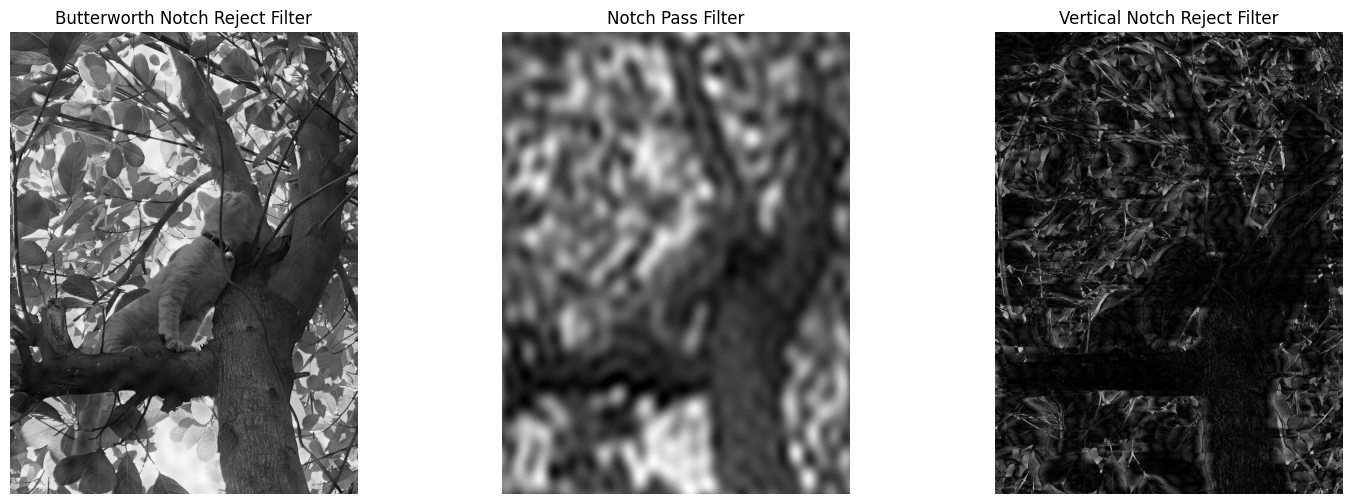

Filtered image saved to: Output/NotchFilter/Butterworth_Notch_Reject_Filter\mycat_grayed_Butterworth_Notch_Reject_Filter.jpg
Filtered image saved to: Output/NotchFilter/Notch_Pass_Filter\mycat_grayed_Notch_Pass_Filter.jpg
Filtered image saved to: Output/NotchFilter/Vertical_Notch_Reject_Filter\mycat_grayed_Vertical_Notch_Reject_Filter.jpg


<Figure size 640x480 with 0 Axes>

In [26]:
# Butterworth Notch Reject Filter
def butterworth_notch_reject_filter(shape, center, radius, n):
    rows, cols = shape
    mask = np.ones((rows, cols), np.float32)
    
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
            mask[i, j] = 1 / (1 + (d / radius) ** (2 * n)) if d <= radius else 1
    
    return mask

# Notch Pass Filter
def notch_pass_filter(shape, center, radius):
    rows, cols = shape
    mask = np.zeros((rows, cols), np.float32)
    
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
            if d <= radius:
                mask[i, j] = 1  # area pass
            else:
                mask[i, j] = 0  # area reject
    
    return mask

# Vertical Notch Reject Filter
def vertical_notch_reject_filter(shape, notch_width):
    rows, cols = shape
    mask = np.ones((rows, cols), np.float32)

    for j in range(cols):
        if (cols // 2 - notch_width // 2 <= j <= cols // 2 + notch_width // 2):
            for i in range(rows):
                mask[i, j] = 0  # reject area
    
    return mask

def apply_filter(image, filter_mask):
    img_array = np.asarray(image, dtype=np.float32)
    fft_img = np.fft.fft2(img_array)
    fft_img_shifted = np.fft.fftshift(fft_img)
    
    filtered_fft = fft_img_shifted * filter_mask
    
    filtered_img = np.fft.ifft2(np.fft.ifftshift(filtered_fft))
    return np.abs(filtered_img)

def save(output_path):
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    print(f"Filtered image saved to: {output_path}")

def process_and_display_nof(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)
    
    image = Image.open(image_path)

    shape = image.size[::-1]  # Menukar urutan agar sesuai dengan (rows, cols)
    center = (shape[0] // 2, shape[1] // 2)  # Pusat filter di tengah gambar
    radius = 20  # Jari-jari Butterworth Notch Reject Filter
    n = 2  # Orde untuk Butterworth

    bnr_filter = butterworth_notch_reject_filter(shape, center, radius, n)
    bnr_img = apply_filter(image, bnr_filter)
    
    np_filter = notch_pass_filter(shape, center, radius)
    np_img = apply_filter(image, np_filter)

    vnr_filter = vertical_notch_reject_filter(shape, notch_width=20)
    vnr_img = apply_filter(image, vnr_filter)

    output_path_bnr = os.path.join("Output/NotchFilter/Butterworth_Notch_Reject_Filter", f"{name}_Butterworth_Notch_Reject_Filter.jpg")
    output_path_np = os.path.join("Output/NotchFilter/Notch_Pass_Filter", f"{name}_Notch_Pass_Filter.jpg")
    output_path_vnr = os.path.join("Output/NotchFilter/Vertical_Notch_Reject_Filter", f"{name}_Vertical_Notch_Reject_Filter.jpg")

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axes[0].imshow(bnr_img, cmap='gray')
    axes[0].set_title("Butterworth Notch Reject Filter")
    axes[0].axis('off')

    axes[1].imshow(np_img, cmap='gray')
    axes[1].set_title("Notch Pass Filter")
    axes[1].axis('off')

    axes[2].imshow(vnr_img, cmap='gray')
    axes[2].set_title("Vertical Notch Reject Filter")
    axes[2].axis('off')

    plt.show()

    save(output_path_bnr)
    save(output_path_np)
    save(output_path_vnr)

process_and_display_nof(input_path)

## Homomorphic Filter

### Choose Image

In [24]:
selected_filename = "mycat_grayed.jpg"  
input_path = os.path.join("Output/Grayed", selected_filename)

### Calculation & Display The Result

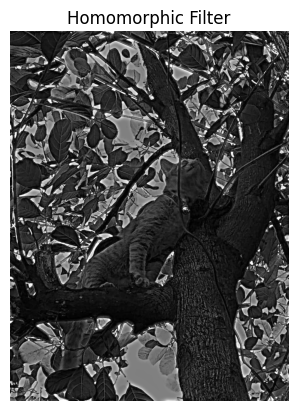

Filtered image saved to: Output/HomomorphicFilter\mycat_grayed_Homomorphic_Filter.jpg


<Figure size 640x480 with 0 Axes>

In [25]:
# Fungsi Homomorphic Filter
def homomorphic_filter(image, gamma_l=0.5, gamma_h=2.0, cutoff=30):
    img_array = np.asarray(image, dtype=np.float32) / 255.0
    
    fft_img = np.fft.fft2(img_array)
    fft_img_shifted = np.fft.fftshift(fft_img)

    rows, cols = img_array.shape
    crow, ccol = rows // 2, cols // 2
    y, x = np.ogrid[:rows, :cols]
    
    d = np.sqrt((x - ccol)**2 + (y - crow)**2)
    hpf_mask = 1 - np.exp(-(d**2) / (2 * (cutoff ** 2)))
    lpf_mask = np.exp(-(d**2) / (2 * (cutoff ** 2)))

    filtered_fft = (gamma_h * hpf_mask + gamma_l * lpf_mask) * fft_img_shifted
    
    filtered_img = np.fft.ifft2(np.fft.ifftshift(filtered_fft))
    
    filtered_img = np.abs(filtered_img)
    filtered_img = np.clip(filtered_img, 0, 1)

    return filtered_img

def save(output_path):
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    print(f"Filtered image saved to: {output_path}")

def process_and_display_homomorphic_filter(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)
    
    image = Image.open(image_path)

    homomorphic_img = homomorphic_filter(image)

    output_path_homomorphic = os.path.join("Output/HomomorphicFilter", f"{name}_Homomorphic_Filter.jpg")

    plt.imshow(homomorphic_img, cmap='gray')
    plt.title("Homomorphic Filter")
    plt.axis('off')
    plt.show()

    save(output_path_homomorphic)

process_and_display_homomorphic_filter(input_path)